# **CS412 - Machine Learning - Fall 2023**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for Homework 1.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)





You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .





## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [ ]:
# code here
import pandas as pd



## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [ ]:
# code here
from google.colab import drive
drive.mount('/content/drive')

path = "/content/cs412_hw1_dataset.csv"
data = pd.read_csv(path)
#data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [ ]:
# code here
print('Shape of the dataset: ')
print(data.shape, "\n")

dependent_var = 'health_metrics'
independent_vars = [col for col in data.columns if col != dependent_var]

print(f"Dependent variable: {dependent_var}")
print(f"Independent variables: {', '.join(independent_vars)}\n")

print('Summary of the dataset: ')
print(data.info, "\n")

print('First 5 rows of dataset: ')
print(data.head(5), "\n")

#Filled data version of filling numbers with the mean of columns
data_filled = data.fillna(data.mean(numeric_only=True))
#Filled data version of filling the rest NA data which are not numbers
data_filled = data_filled.fillna(method='bfill')
data_filled = data_filled.fillna(method='ffill')
#print(data.isnull().sum())
#print(data_filled.isnull().sum())
print('Filled data: ')
print(data_filled)


Shape of the dataset: 
(3430, 11) 

Dependent variable: health_metrics
Independent variables: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, diet, life_stage, year

Summary of the dataset: 
<bound method DataFrame.info of      species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Adelie  Biscoe            53.4           17.8              219.0   
1     Adelie  Biscoe            49.3           18.1              245.0   
2     Adelie  Biscoe            55.7           16.6              226.0   
3     Adelie  Biscoe            38.0           15.6              221.0   
4     Adelie  Biscoe            60.7           17.9              177.0   
...      ...     ...             ...            ...                ...   
3425  Gentoo  Biscoe            44.0           20.4              252.0   
3426  Gentoo  Biscoe            54.5           25.2              245.0   
3427  Gentoo     NaN            51.4           20.4              258.0   


In [ ]:
sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

species_map = {'Adelie': 1,
               'Chinstrap': 2,
               'Gentoo': 3}

# code here

print(data_filled)

data_filled['sex'] = data_filled['sex'].map(sex_map)
data_filled['island'] = data_filled['island'].map(island_map)
data_filled['diet'] = data_filled['diet'].map(diet_map)
data_filled['life_stage'] = data_filled['life_stage'].map(life_stage_map)
data_filled['health_metrics'] = data_filled['health_metrics'].map(health_metrics_map)
data_filled['species'] = data_filled['species'].map(species_map)

print('\nAfter encoding: ')
print(data_filled)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Adelie  Biscoe            53.4           17.8              219.0   
1     Adelie  Biscoe            49.3           18.1              245.0   
2     Adelie  Biscoe            55.7           16.6              226.0   
3     Adelie  Biscoe            38.0           15.6              221.0   
4     Adelie  Biscoe            60.7           17.9              177.0   
...      ...     ...             ...            ...                ...   
3425  Gentoo  Biscoe            44.0           20.4              252.0   
3426  Gentoo  Biscoe            54.5           25.2              245.0   
3427  Gentoo  Biscoe            51.4           20.4              258.0   
3428  Gentoo  Biscoe            55.9           20.5              247.0   
3429  Gentoo  Biscoe            43.9           22.9              206.0   

      body_mass_g     sex   diet life_stage health_metrics    year  
0      5687.00000  female   fish      adul

## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# code here
shuffled_data = data_filled.sample(frac=1, random_state=42)
shuffled_data = shuffled_data.reset_index(drop=True)

y = shuffled_data['health_metrics']
X = shuffled_data.drop(columns=['health_metrics'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of X_train, X_test, y_train, y_test:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



Shapes of X_train, X_test, y_train, y_test:
(2744, 10) (686, 10) (2744,) (686,)


## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


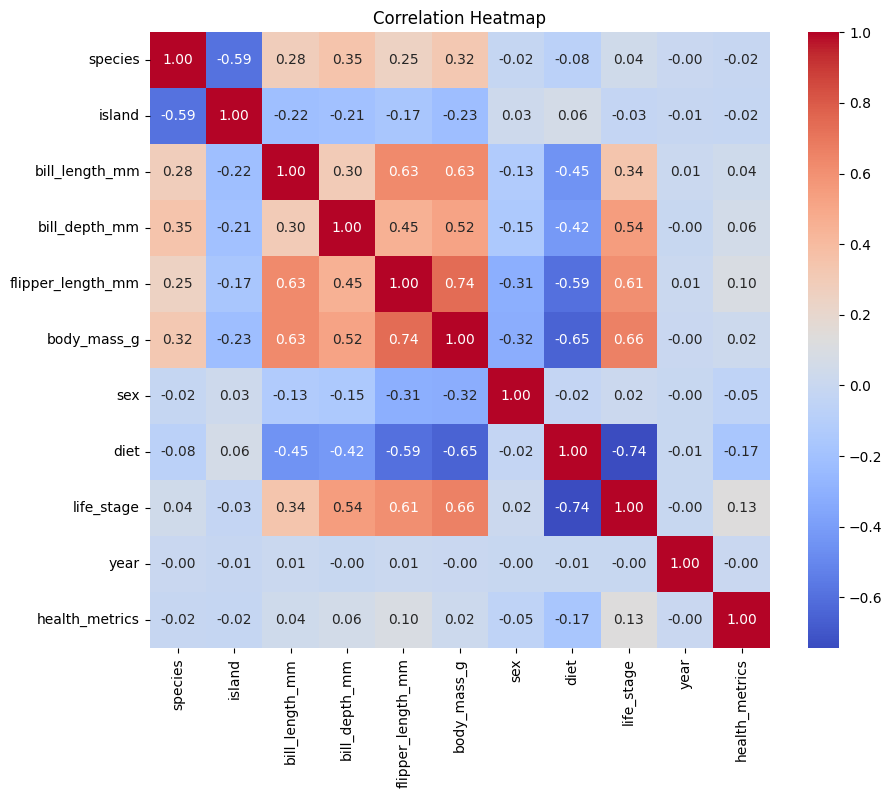

Features strongly correlated with 'health_metrics':
Series([], Name: health_metrics, dtype: float64)


In [ ]:
# code here
import seaborn as sns
import matplotlib.pyplot as plt

full_data = pd.concat([X, y], axis=1)

correlations = full_data.corr()

target_correlations = correlations['health_metrics'].drop('health_metrics')

threshold = 0.3

strong_correlations = target_correlations[abs(target_correlations) > threshold]

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

print("Features strongly correlated with 'health_metrics':")
print(strong_correlations)


In [ ]:
# code here
abs_correlations = correlations.abs()

strong_predictors = abs_correlations['health_metrics'][abs_correlations['health_metrics'] > threshold].sort_values(ascending=False)

print("Strongest predictors and their correlations with 'health_metrics':")
print(strong_predictors)

Strongest predictors and their correlations with 'health_metrics':
health_metrics    1.0
Name: health_metrics, dtype: float64


**You can write your answers to (4.1) here.**
----
----
First of hypothetical features might be the age. We can take the square of age and compare them it with health metrics which may give us a non-linear relation.
Secondly, we can use physical activity feature like the data of person's daily exercises or workout routines and we can combined them as a score. Higher scores might related with health metrics such as healthy or underweight.

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# code here

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

test_accuracy = best_clf.score(X_test, y_test)

print("Best hyperparameters:", best_params)
print("Validation accuracy with best hyperparameters:", best_score)
print("Test accuracy with best hyperparameters:", test_accuracy)


Best hyperparameters: {'criterion': 'entropy', 'splitter': 'best'}
Validation accuracy with best hyperparameters: 0.8884866977783096
Test accuracy with best hyperparameters: 0.9096209912536443


**Add explanation here:**
I choose criterion and splitter parameters. When I studying midterm exam, I watched decision tree video which was calculating the gini impurity for selecting the node feature. Therefore, I know little bit about that and I selected criterion as first parameter. And for second, I choose splitter which seems kind a cool by saying the best random split. There is no logical reason behind my choice.

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [ ]:
# code here
best_params = {'splitter': 'best', 'criterion': 'gini'}

best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

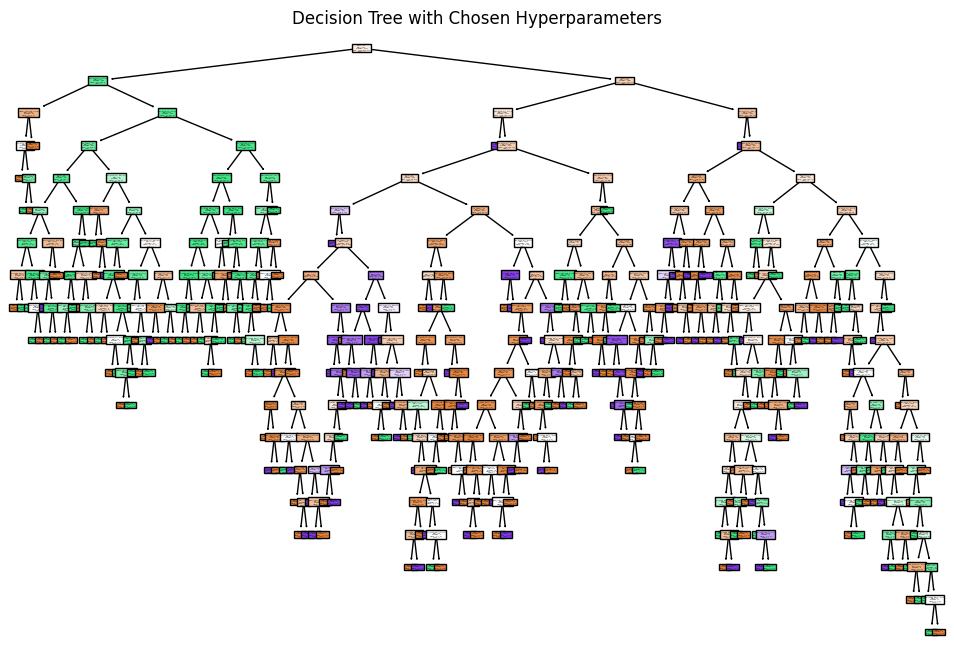

In [ ]:
from sklearn.tree import plot_tree

#code here
class_names = list(map(str, best_clf.classes_))

feature_names = list(X_train.columns)

plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=feature_names, class_names=class_names)
plt.title('Decision Tree with Chosen Hyperparameters')
plt.show()


## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [ ]:
# code here
predicted_labels = best_clf.predict(X_test)

print("Predicted labels for the testing data:")
print(predicted_labels)


Predicted labels for the testing data:
[1 1 2 1 1 1 2 2 3 1 1 2 2 1 1 1 2 2 3 2 1 2 1 1 3 2 2 1 3 1 3 3 3 2 2 1 2
 1 2 2 2 1 1 1 1 1 2 1 3 1 2 1 3 3 1 1 2 2 2 1 2 3 2 2 2 1 2 1 2 2 1 1 1 3
 2 2 3 2 3 3 1 1 2 1 2 1 1 2 3 1 3 1 1 1 3 1 2 1 1 1 3 2 3 2 3 1 1 2 3 1 2
 2 1 2 3 2 2 1 1 1 2 1 1 2 1 2 3 2 1 3 1 1 2 1 1 2 2 1 2 1 1 2 2 2 2 2 2 1
 2 1 3 1 1 1 2 1 1 2 3 1 2 1 1 1 2 3 3 2 1 1 1 2 3 3 1 1 1 1 1 1 1 2 2 2 2
 1 2 2 1 1 2 1 1 1 1 2 2 1 1 3 1 2 3 1 1 2 2 1 2 3 1 1 1 3 1 1 1 1 1 2 2 1
 1 1 3 3 1 1 2 1 2 3 3 3 1 3 1 3 2 1 3 1 2 1 2 1 1 3 1 1 1 1 3 1 2 2 1 1 2
 3 3 1 2 1 1 1 1 2 3 1 1 2 1 2 3 1 1 3 1 1 3 3 1 1 1 3 2 1 3 2 2 1 2 1 1 1
 1 1 1 1 2 1 2 2 1 3 1 3 2 2 3 2 2 1 2 1 3 1 2 3 2 3 2 3 2 3 1 1 1 2 2 1 2
 3 1 3 1 1 2 1 1 2 3 3 1 3 1 1 1 1 2 2 1 1 2 1 1 2 2 1 2 1 2 3 1 1 3 3 1 1
 1 3 2 1 3 1 1 1 1 1 1 2 2 2 3 2 1 1 1 3 1 1 2 1 2 2 2 1 2 3 2 1 2 2 1 2 1
 1 1 1 1 3 2 1 2 2 3 1 1 1 3 2 2 1 1 2 2 2 1 3 1 1 2 1 1 1 1 3 1 3 1 3 1 2
 1 2 1 1 1 3 2 2 2 2 1 2 1 1 1 1 1 2 1 3 2 1 3 3 2 2 2 3 3 2 

Classification Accuracy: 0.8921


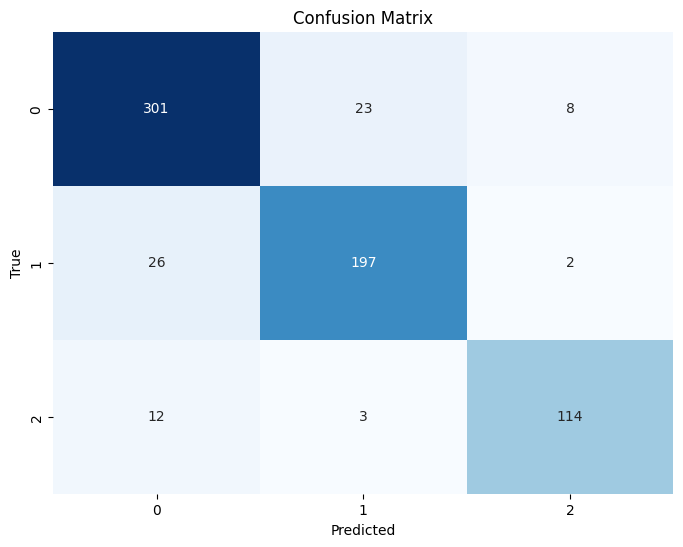

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#code here
accuracy = accuracy_score(y_test, predicted_labels)

print(f"Classification Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Fill the blanks:** The model most frequently mistakes class(es) 1 for class(es) 0 with value of 26.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
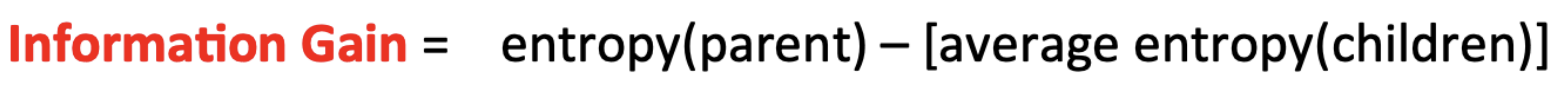



In [ ]:
# code here
import numpy as np

clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X, y)

parent_entropy = -np.sum((np.sum((y[:, None] == np.unique(y)).astype(int), axis=0) / len(y)) * np.log2(np.sum((y[:, None] == np.unique(y)).astype(int), axis=0) / len(y)))

average_child_entropy = (len(clf_entropy.tree_.children_left) * clf_entropy.tree_.impurity[clf_entropy.tree_.children_left] +
                         len(clf_entropy.tree_.children_right) * clf_entropy.tree_.impurity[clf_entropy.tree_.children_right]) / len(y)

information_gain = parent_entropy - average_child_entropy

print("Information Gain:", information_gain)


Information Gain: [1.2159293  1.36011251 1.23963097 1.29394578 1.30260861 1.42832342
 1.51813099 1.45844901 1.51813099 1.39004692 1.51813099 1.51813099
 1.51813099 1.51813099 1.46569371 1.51813099 1.41099939 1.51813099
 1.51813099 1.51813099 1.51813099 1.47398715 1.51813099 1.51813099
 1.51813099 1.51813099 1.30831731 1.39645399 1.38473177 1.31343283
 1.34500554 1.51813099 1.51813099 1.51813099 1.36973449 1.51813099
 1.51813099 1.51813099 1.51813099 1.41099939 1.51813099 1.51813099
 1.51813099 1.51813099 1.51813099 1.4469256  1.38185911 1.51813099
 1.51813099 1.51813099 1.51813099 1.51813099 1.24463764 1.29280796
 1.37192659 1.51813099 1.43032882 1.46007182 1.51813099 1.36973449
 1.51813099 1.51813099 1.51813099 1.51813099 1.51813099 1.38870524
 1.34640902 1.37062039 1.39774016 1.36973449 1.38185911 1.51813099
 1.51813099 1.51813099 1.51813099 1.51813099 1.51813099 1.51813099
 1.51813099 1.51813099 1.51813099 1.51813099 1.23097318 1.39774016
 1.37404532 1.51813099 1.39774016 1.51813099

<ipython-input-113-c45be0f44265>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  parent_entropy = -np.sum((np.sum((y[:, None] == np.unique(y)).astype(int), axis=0) / len(y)) * np.log2(np.sum((y[:, None] == np.unique(y)).astype(int), axis=0) / len(y)))
